In [1]:
from board import Board
from game_logic import LabyrinthEnv
import os
import platform

In [2]:
def clear_console():
    import os
    import platform
    if platform.system() == "Darwin":
        os.system("clear")

def display_board(env, player, valid_moves):
    clear_console()
    print(f"\n--- Start of Turn for Player {player.id} ---")
    print(f"Player {player.id} Location: {player.position}")
    print(f"Player {player.id} Current Card: {player.current_card}")
    env.board.visualize_board(env.players, valid_moves=valid_moves)
    env.board.visualize_excess_tile()

def prompt_rotation(env, player):
    while True:
        try:
            rotation_input = input(f"Player {player.id}, enter rotation for the spare tile (0, 90, 180, 270): ").strip()
            rotation = int(rotation_input)
            if rotation not in [0, 90, 180, 270]:
                raise ValueError("Invalid rotation. Please enter 0, 90, 180, or 270.")
            env.board.rotate_excess_tile(rotation)
            break
        except ValueError as e:
            print(e)
    return rotation

def prompt_push_direction():
    while True:
        direction = input("Enter push direction (left, right, up, down): ").strip().lower()
        if direction in ['left', 'right', 'up', 'down']:
            return direction
        print("Invalid direction. Please enter 'left', 'right', 'up', or 'down'.")

def prompt_push_location():
    while True:
        try:
            position = int(input("Enter push location (1, 3, or 5): "))
            if position in [1, 3, 5]:
                return position
            print("Invalid position. Please enter 1, 3, or 5.")
        except ValueError:
            print("Invalid input. Please enter a number (1, 3, or 5).")

def take_turn(env, player):
    valid_moves = env.get_valid_moves(player.position)
    display_board(env, player, valid_moves)

    rotation = prompt_rotation(env, player)

    correct_orientation = input(f"Player {player.id}, is this orientation correct? (y/n): ").strip().lower()
    if correct_orientation != "y":
        return  # Restart the turn if orientation is not correct

    direction = prompt_push_direction()
    position = prompt_push_location()

    while True:
        try:
            env.step(player.id, {'type': 'push', 'direction': direction, 'position': position})
            clear_console()
            print("Push successful")
            break
        except ValueError as e:
            print(e)
            direction = prompt_push_direction()
            position = prompt_push_location()

    valid_moves = env.get_valid_moves(player.position)
    env.board.visualize_board(env.players, valid_moves=valid_moves)
    env.board.visualize_excess_tile()

    while True:
        try:
            new_row = int(input("Enter target row for movement: "))
            new_col = int(input("Enter target column for movement: "))
            if 0 <= new_row < env.board.size and 0 <= new_col < env.board.size:
                if env.is_valid_move(player.position, (new_row, new_col)):
                    env.step(player.id, {'type': 'move', 'player_id': player.id, 'new_position': (new_row, new_col)})
                    break
                else:
                    print(f"({new_row}, {new_col}) is invalid. Choose a valid path.")
            else:
                print("Invalid position. Please enter coordinates within the board range (0-6).")
        except ValueError:
            print("Invalid input. Please enter valid row and column numbers.")

    clear_console()
    env.board.visualize_board(env.players)
    print(f"\n--- End of Turn for Player {player.id} ---")





--- Start of Turn for Player 1 ---
Player 1 Location: (0, 0)
Player 1 Current Card: O
Valid Moves: {(0, 0)}


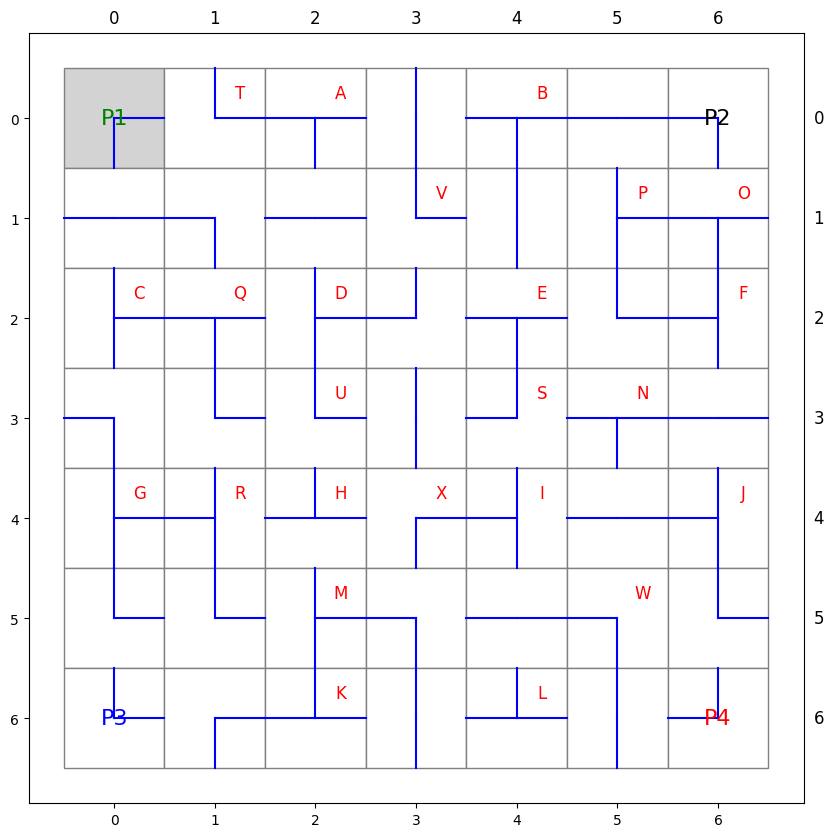

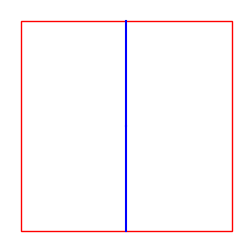

Push successful
Valid Moves: {(0, 1), (0, 2), (0, 0)}


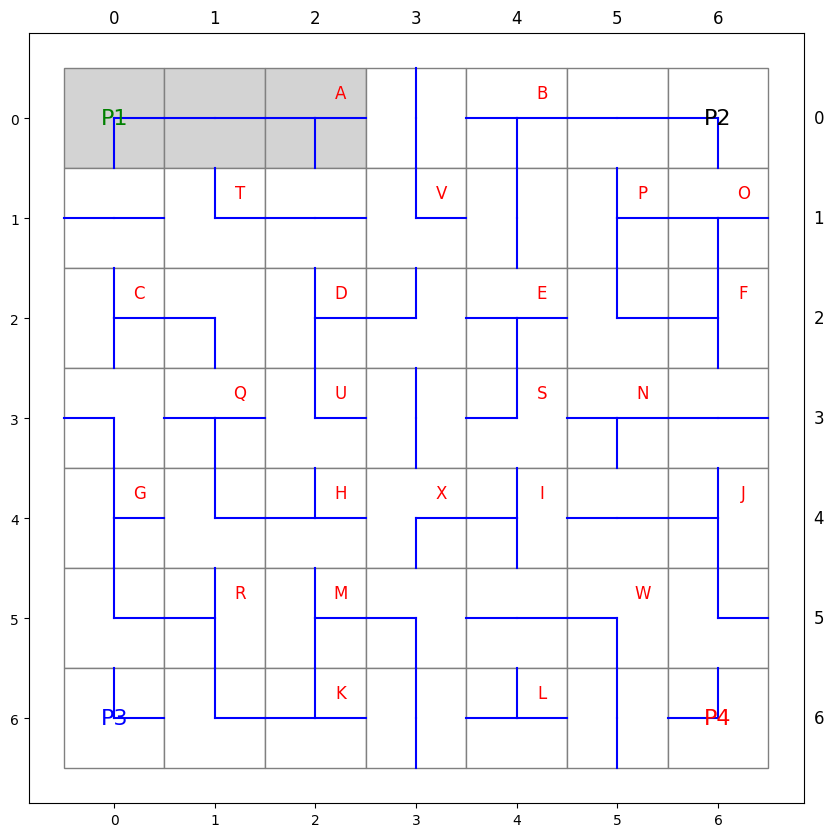

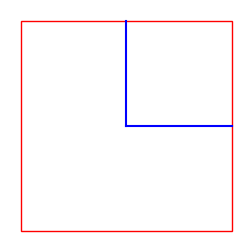

Valid Moves: set()


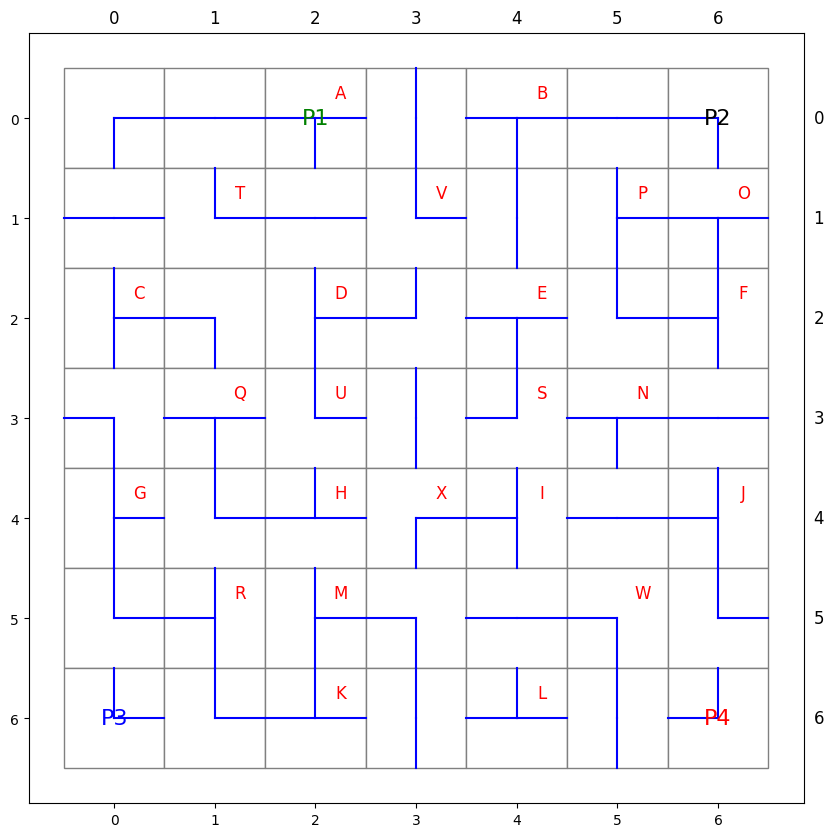


--- End of Turn for Player 1 ---

--- Start of Turn for Player 2 ---
Player 2 Location: (0, 6)
Player 2 Current Card: P
Valid Moves: {(1, 4), (0, 4), (0, 5), (0, 6)}


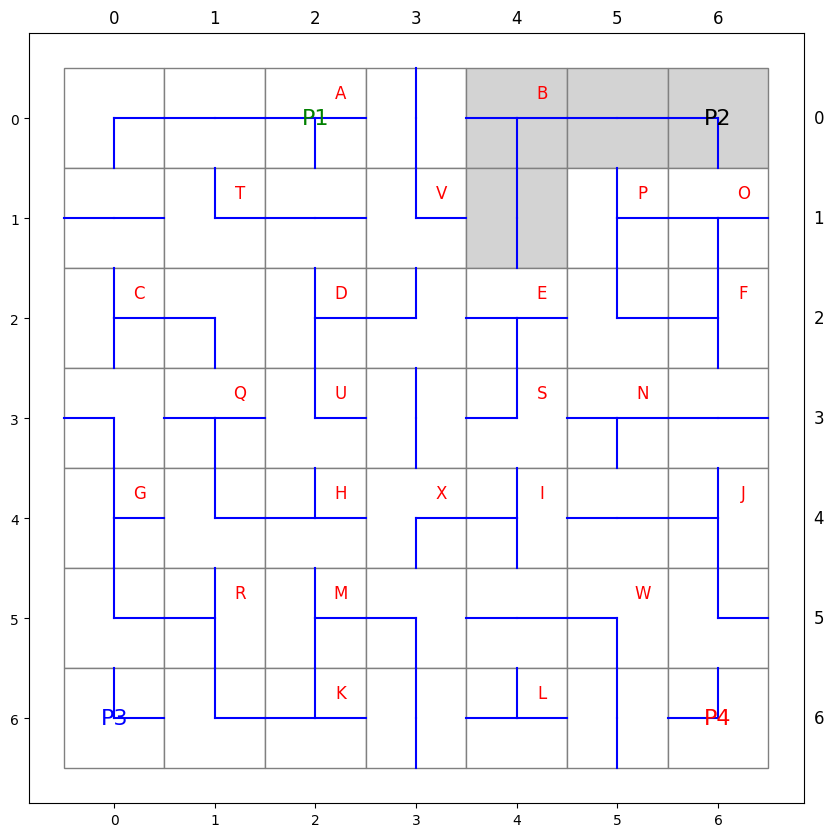

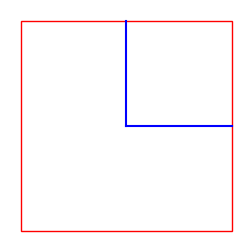


--- Start of Turn for Player 3 ---
Player 3 Location: (6, 0)
Player 3 Current Card: K
Valid Moves: {(6, 0)}


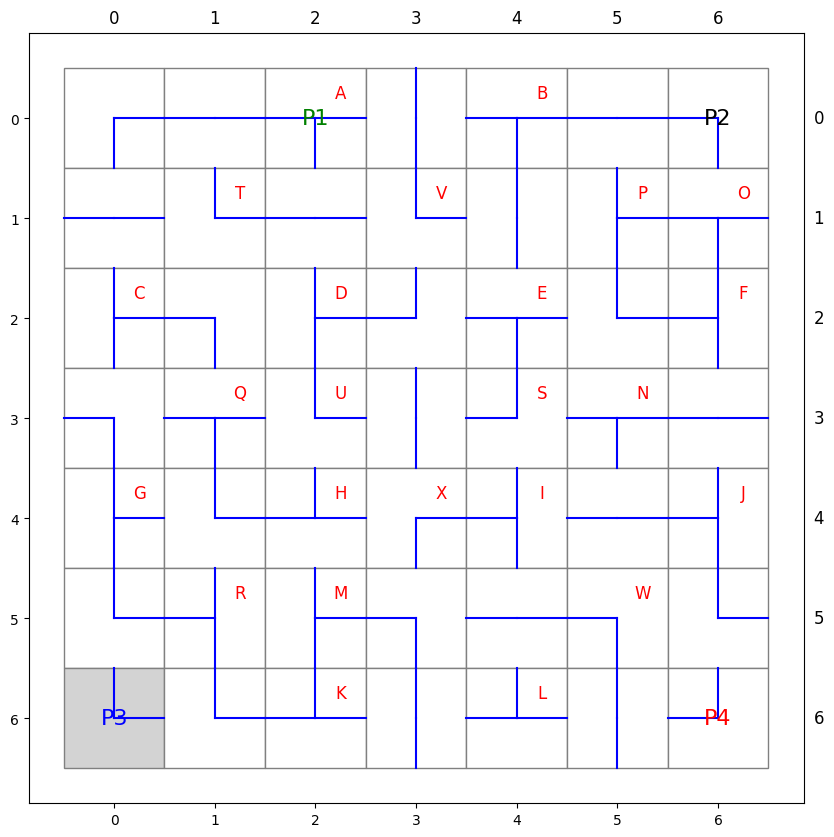

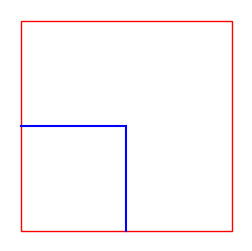

invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''


In [3]:
def main():
    board = Board(size=7)
    env = LabyrinthEnv(board)
    current_player_index = 0

    while True:
        player = env.players[current_player_index]
        take_turn(env, player)
        current_player_index = (current_player_index + 1) % len(env.players)

if __name__ == "__main__":
    main()